In [1]:
import  keras
from  keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

C:\Users\Jakub\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(128, 40) nozyczki_audacity-1.wav
(128, 40) nozyczki_audacity-10.wav
(128, 40) nozyczki_audacity-11.wav
(128, 40) nozyczki_audacity-12.wav
(128, 40) nozyczki_audacity-13.wav
(128, 40) nozyczki_audacity-14.wav
(128, 40) nozyczki_audacity-15.wav
(128, 40) nozyczki_audacity-16.wav
(128, 40) nozyczki_audacity-17.wav
(128, 40) nozyczki_audacity-18.wav
(128, 40) nozyczki_audacity-19.wav
(128, 40) nozyczki_audacity-2.wav
(128, 40) nozyczki_audacity-20.wav
(128, 34) nozyczki_audacity-3.wav
(128, 34) nozyczki_audacity-4.wav
(128, 34) nozyczki_audacity-5.wav
(128, 40) nozyczki_audacity-6.wav
(128, 40) nozyczki_audacity-7.wav
(128, 40) nozyczki_audacity-8.wav
(128, 40) nozyczki_audacity-9.wav


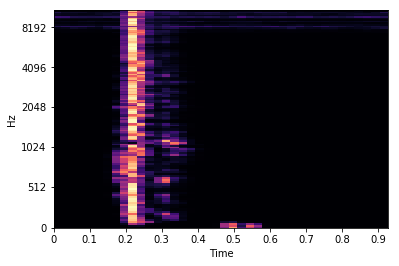

In [2]:
scissors = []
for file in os.listdir("nozyczki_pojedyncze/"):
##'nozyczki_pojedyncze/nozyczki_audacity-1.wav'
    y, sr = librosa.load(os.path.join("nozyczki_pojedyncze/", file))
    scissors.append(y)
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    print(ps.shape,file,)
    librosa.display.specshow(keras.utils.normalize(ps,axis=-1,order=2), y_axis='mel', x_axis='time')

In [3]:
#clear, sr = librosa.load("Tame_Impala_Let_It_Happen.wav")
clear=[]
for folder in ["muzyka"]:
    for file in os.listdir(folder):
        if(".wav" in file):
            probes,sr = librosa.load(folder+"/"+file)
            clear.extend(probes)
            print(file,len(clear))
clear=np.array(clear)
print("done")

Apocalyptica- Bittersweet .wav 4484736
Evanescence - October .wav 13012416
Iron Maiden - Wasting love (Nicolas Mussi remix) www.eNutka.net.wav 14369472
muzyka-01.wav 17507520
muzyka-02.wav 20590272
muzyka-03.wav 22026816
Tame_Impala_Let_It_Happen.wav 27681408


In [4]:
addition = np.array(1)
addition = np.append(addition,scissors[random.randint(0,19)])
clear_len = len(clear)
while(len(addition)<clear_len):
    addition = np.append(addition,scissors[random.randint(0,19)])
print(len(addition))
noise = addition[0:len(clear)]+clear
librosa.output.write_wav('muzyka_szum.wav', noise, sr) 

27698975


In [5]:
def saving_spectograms(array,sr,ln,file,ok):
    if(ok):
        folder = "ok"
    else:
        folder = "nok"
    #plt.figure()
    data = []
    i=0
    for probe in array:
        ps = librosa.feature.melspectrogram(y=probe, sr=sr,hop_length=ln)
        #print(ps.shape)
        np.save(folder+"/spectogram_"+file+"{0}".format(i),ps)
        data.append(ps)
        #librosa.display.specshow(ps)
        #plt.savefig(folder+"/spectogram_"+file+"{0}".format(i))
        i+=1
    print("Stworzono {0} spektogramów do folderu {1}".format(i,folder))
    return data

In [6]:
def sampling_for_spectograms(array,samples_full):
    array_reshaped = np.array([array[i*samples_full:(i+1)*samples_full] for i in range(len(array)//samples_full)])
    print(array_reshaped.shape)
    return array_reshaped

In [7]:
def music_to_spectograms(music,row_samples,full_samples,sr,ok,file="zwykly"):
    #reshaping
    music_reshaped = sampling_for_spectograms(music,full_samples)
    final = np.array(saving_spectograms(music_reshaped,sr,row_samples,file,ok))
    return final    

In [8]:
print(noise.shape,clear.shape)
time_duration = 20 ##ms
samples_for_spectogram = int(0.001*time_duration*sr*128)
print("we need {0} samples for {1} ms. spectogram 128x128 nedd {2}".format(0.001*time_duration*sr,time_duration,samples_for_spectogram))
ok = music_to_spectograms(clear,442,samples_for_spectogram,sr,True)
nok = music_to_spectograms(noise,442,samples_for_spectogram,sr,False)
print(ok.shape)

(27681408,) (27681408,)
we need 441.0 samples for 20 ms. spectogram 128x128 nedd 56448
(490, 56448)
Stworzono 490 spektogramów do folderu ok
(490, 56448)
Stworzono 490 spektogramów do folderu nok
(490, 128, 128)


# Data augmentation #not working

In [31]:
#time streching
for strech in [0.81,1.07]:
    ok = music_to_spectograms(librosa.effects.time_stretch(clear, rate=strech),442,samples_for_spectogram,sr,True,file="time_strech_{0}".format(strech))
    nok = music_to_spectograms(librosa.effects.time_stretch(noise, rate=strech),442,samples_for_spectogram,sr,False,file="time_strech_{0}".format(strech))
print("done")

(167, 56448)
Stworzono 167 spektogramów do folderu ok
(167, 56448)
Stworzono 167 spektogramów do folderu nok
(126, 56448)
Stworzono 126 spektogramów do folderu ok
(126, 56448)
Stworzono 126 spektogramów do folderu nok
done


In [32]:
#Pich shift and vary
for n in [-1,-2,2,1,-2.5, -3.5, 2.5, 3.5]:
    ok = music_to_spectograms(librosa.effects.pitch_shift(clear,sr,n_steps=n),442,samples_for_spectogram,sr,True,file="wary_pich{0}".format(n))
    nok = music_to_spectograms(librosa.effects.pitch_shift(noise,sr,n_steps=n),442,samples_for_spectogram,sr,False,file="wary_pich_{0}".format(n))
print("done")

(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
(135, 56448)
Stworzono 135 spektogramów do folderu ok
(135, 56448)
Stworzono 135 spektogramów do folderu nok
done


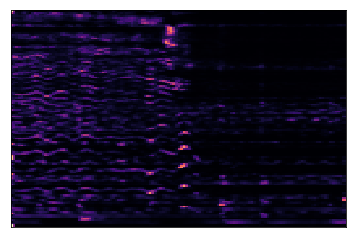

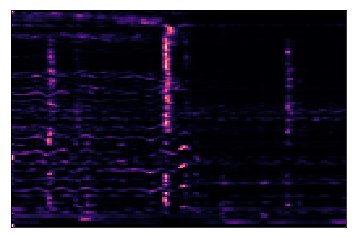

In [10]:
#data searching
plt.figure()

for file in ["ok/spectogram_zwykly19.npy","nok/spectogram_zwykly19.npy"]:
    spectogram = np.load(file)
    librosa.display.specshow(keras.utils.normalize(spectogram,axis=-1,order=2))
    plt.savefig("spektogramy/"+file[0:-4])
    plt.show()

# Data preapering

In [11]:
D = [] # Dataset
for folder in ["ok","nok"]:
    for file in os.listdir(folder):
        spectogram = np.load(folder+"/"+file)
        if spectogram.shape != (128, 128): continue
        D.append( (keras.utils.normalize(spectogram,axis=-1,order=2), folder) )
print(len(D),"done")

980 done


In [12]:
dataset = D
print(len(D))
print(len(D[0]))
print(len(D[0][0]))
random.shuffle(dataset)

train = dataset[:880]
test = dataset[880:]

x_train, y_train = zip(*train)
x_test, y_test = zip(*test)

# Reshape for CNN input
x_train = np.array([x.reshape( (128, 128, 1) ) for x in x_train])
x_test = np.array([x.reshape( (128, 128, 1) ) for x in x_test])

# One-Hot encoding for classes
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
print(y_test)

980
2
128
[1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1]


In [13]:
Tensor_board = keras.callbacks.TensorBoard(log_dir='./logs')

In [14]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

In [15]:
model.load_weights('my_model_weights_53.h5')

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          epochs=50,
          batch_size=128,
          callbacks = [Tensor_board])

score = model.evaluate(x_test, y_test, batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
## tensorboard --logdir C:\Users\Jakub\praca_inzynierska\Scissors_falling\logs --port=8080

Epoch 1/50
880/880 [==============================] - 47s 53ms/step - loss: 0.2955 - acc: 0.8739
Epoch 2/50
880/880 [==============================] - 48s 55ms/step - loss: 0.2720 - acc: 0.8818
Epoch 3/50
880/880 [==============================] - 51s 58ms/step - loss: 0.2470 - acc: 0.9000
Epoch 4/50
880/880 [==============================] - 51s 58ms/step - loss: 0.2258 - acc: 0.8989
Epoch 5/50
880/880 [==============================] - 48s 55ms/step - loss: 0.1945 - acc: 0.9148
Epoch 6/50
880/880 [==============================] - 53s 60ms/step - loss: 0.1862 - acc: 0.9250
Epoch 7/50
880/880 [==============================] - 47s 54ms/step - loss: 0.1763 - acc: 0.9273
Epoch 8/50
880/880 [==============================] - 46s 52ms/step - loss: 0.1699 - acc: 0.9330
Epoch 9/50
880/880 [==============================] - 51s 58ms/step - loss: 0.1576 - acc: 0.9330
Epoch 10/50
880/880 [==============================] - 56s 63ms/step - loss: 0.1450 - acc: 0.9352
Epoch 11/50
880/880 [========

In [17]:
model.save("model.h5")
model.save_weights('my_model_weights_85.h5')

In [18]:
print(history.history)

{'loss': [0.2954925309528004, 0.27203688784079116, 0.24701548787680538, 0.22577716924927452, 0.19446191733533685, 0.18622555217959663, 0.17633888911117207, 0.16993657458912242, 0.15761450014331124, 0.1449504933573983, 0.13643297363411297, 0.13288453749635004, 0.14578311849724163, 0.13176598765633324, 0.10155589011582461, 0.11397088955749166, 0.11559974090619521, 0.10803367766467008, 0.09915207475423812, 0.09364141699942675, 0.09842097569595684, 0.09991762705824592, 0.07973739233883945, 0.09621169350363991, 0.09227673289450732, 0.08717013285918669, 0.0840015359222889, 0.07129483155228875, 0.062275995314121244, 0.05996747084639289, 0.06603617424314673, 0.059426885504614224, 0.060519222915172574, 0.05055306601253423, 0.05513580895283005, 0.054993078349666165, 0.05634698691693219, 0.06264322704889558, 0.05746872716329315, 0.050705467164516446, 0.052001757598058744, 0.04392235421321609, 0.04707183052193035, 0.05136209448630159, 0.05410821742632172, 0.05681499405340715, 0.048628022047606384,